<a href="https://colab.research.google.com/github/CD-AC/Master_AI/blob/main/muinar06_act1_individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REDES NEURONALES

---



En esta actividad vamos a utilizar una red neuronal para clasificar imágenes de dígitos del 0 al 9 escritos a mano. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es MNIST, una base de datos constituida por (como no) imágenes de dígitos escritos a mano. Este dataset es ampliamente utilizado en docencia como punto de entrada al entrenamiento de redes neuronales y otros, pero también es muy utilizado en trabajos reales de investigación para el entrenamiento de imágenes. Puedes consultar más información sobre el dataset en [este enlace](https://es.wikipedia.org/wiki/Base_de_datos_MNIST).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas celdas si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados y que son perfectamente visibles en la versión PDF que debes entregar adjunta**. Por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch.

In [4]:
from keras.datasets.mnist import load_data
import tensorflow as tf
import matplotlib.pyplot as plt

Tenemos la suerte de que el dataset MNIST, el que vamos a utilizar en esta actividad, está guardado en Keras, por lo que podemos utilizarlo sin necesidad de buscar el dataset de forma externa.

In [5]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen los dígitos y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [6]:
(training_images, training_labels), (test_images, test_labels) = load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0 

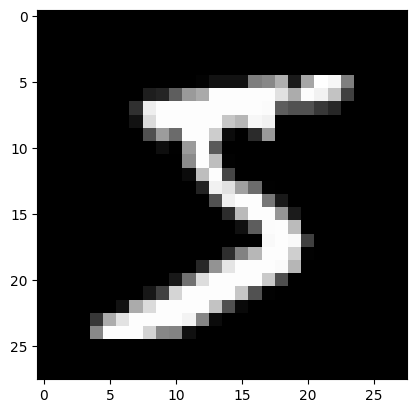

In [7]:
import numpy as np
np.set_printoptions(linewidth=200)
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(training_labels[0])
print(training_images[0])

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [8]:
### Tu código aquí ###
print("Número de imágenes de entrenamiento:", training_images.shape[0])
print("Número de imágenes de test:", test_images.shape[0])
print("Tamaño de las imágenes:", training_images.shape[1], "x", training_images.shape[2])

Número de imágenes de entrenamiento: 60000
Número de imágenes de test: 10000
Tamaño de las imágenes: 28 x 28


*Tu respuesta aquí*

**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

In [9]:
### Tu código aquí ###
print("Tipo de dato de las imágenes de entrenamiento:", training_images.dtype)
print("Valores mínimos y máximos de píxeles:", training_images.min(), training_images.max())
print("Tipo de dato de las etiquetas de entrenamiento:", training_labels.dtype)

Tipo de dato de las imágenes de entrenamiento: uint8
Valores mínimos y máximos de píxeles: 0 255
Tipo de dato de las etiquetas de entrenamiento: uint8


*Tu respuesta aquí*

Un ejemplo del dataset es una imagen en escala de grises de 28x28 píxeles que representa un dígito escrito a mano (del 0 al 9). Cada píxel contiene un valor de intensidad entre 0 y 255. La información en 'y' (las etiquetas) contiene el dígito correcto que representa cada imagen.

## 2. Normalización y preprocesado de los datos

**Pregunta 2.1 (0.25 puntos)** Habreis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. ¿Cómo lo podemos hacer?

In [10]:
### Tu código aquí ###
training_images = training_images / 255.0
test_images = test_images / 255.0

**Pregunta 2.2 (0.25 puntos)** Utiliza la función ***reshape*** de Numpy para convertir las imágenes en vectores de características de un tamaño de (N, 784). Explica con tus palabras por qué es necesario hacer esto.



In [11]:
### Tu código aquí ###
training_images = training_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)

**Respuesta a la pregunta 2.2**:

Es necesario convertir las imágenes de 28x28 a un vector de 784 elementos porque las capas densas de una red neuronal esperan una entrada unidimensional.

**Pregunta 2.3 (0.25 puntos)** Para facilitar el desarrollo de la actividad, vamos a expresar las etiquetas así:

In [12]:
training_labels = tf.keras.utils.to_categorical(training_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

Muestra cómo son ahora los datos, como resultado de este cambio y también de los realizados en las dos preguntas anteriores. Debate cómo se beneficiará la red neuronal de todos estos cambios.

In [13]:
### Tu código aquí ###
print("Dimensiones de las imágenes de entrenamiento después del preprocesamiento:", training_images.shape)
print("Dimensiones de las etiquetas de entrenamiento después del preprocesamiento:", training_labels.shape)
print("Primeras 5 etiquetas de entrenamiento después de to_categorical:\n", training_labels[0:5])

Dimensiones de las imágenes de entrenamiento después del preprocesamiento: (60000, 784)
Dimensiones de las etiquetas de entrenamiento después del preprocesamiento: (60000, 10)
Primeras 5 etiquetas de entrenamiento después de to_categorical:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Respuesta a la pregunta 2.3:

Ahora las imágenes son vectores normalizados entre 0 y 1, y las etiquetas están en formato one-hot encoding. La normalización ayuda a que el entrenamiento sea más estable y rápido. El one-hot encoding es necesario para la función de pérdida categorical_crossentropy utilizada en problemas de clasificación multiclase.

## 3. Creación del Modelo

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy útiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas cómo eran las imágenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa (en problemas de clasificación de más de dos items)
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 3.1 (0.5 puntos)**. Utilizando Keras, y preparando los datos de X e Y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de MNIST con las siguientes características:

* Una capa de entrada del tamaño adecuado.
* Una capa oculta de 512 neuronas.
* Una capa final con 10 salidas.

In [14]:
### Tu código para la red neuronal de la pregunta 3 aquí ###
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
  tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Pregunta 3.2 (0.25 puntos)**: ¿crees conveniente utilizar una capa flatten en este caso? Motiva tu respuesta.



In [15]:
### Tu código para incluir una capa flatten si lo ves necesario ###

**Respuesta a la pregunta 3.2**:

**Pregunta 3.3 (0.25 puntos)**: Utiliza la función summary() para mostrar la estructura de tu modelo.

In [15]:
### Tu código aquí ###
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

## 4: Compilación y entrenamiento

**Pregunta 4.1 (0.5 puntos)**: Compila tu modelo. Utiliza ***categorical_crossentropy*** como función de pérdida, ***Adam*** como optimizador, y monitoriza la ***tasa de acierto*** durante el entrenamiento. Explica qué hace cada cosa en la compilación.

In [16]:
### Tu código aquí ###
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Respuesta a la pregunta 4.1**:

- Optimizer ('adam'): Es el algoritmo que ajusta los pesos de la red para minimizar la función de pérdida. Adam es un optimizador eficiente.

- Loss ('categorical_crossentropy'): Es la función que mide qué tan bien se desempeña el modelo; calcula la diferencia entre la salida predicha y las etiquetas reales (en formato one-hot encoding). Se busca minimizar este valor.

- Metrics (['accuracy']): Son las métricas que se monitorean durante el entrenamiento y la evaluación para entender el rendimiento del modelo. La precisión mide el porcentaje de predicciones correctas.

**Pregunta 4.2 (0.5 puntos)**: Utiliza la función ***fit()*** para entrenar tu modelo. Para ayudarte en tu primer entrenamiento, utiliza estos valores:
*   epochs = 5
*   batch_size = 32
*   validation_split = 0.25



In [18]:
### Tu código aquí ###
history = model.fit(training_images, training_labels, epochs=5, batch_size=32, validation_split=0.25)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8891 - loss: 0.3757 - val_accuracy: 0.9634 - val_loss: 0.1217
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9716 - loss: 0.0958 - val_accuracy: 0.9670 - val_loss: 0.1080
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9837 - loss: 0.0543 - val_accuracy: 0.9739 - val_loss: 0.0859
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9880 - loss: 0.0392 - val_accuracy: 0.9690 - val_loss: 0.1045
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9905 - loss: 0.0285 - val_accuracy: 0.9685 - val_loss: 0.1168


# 5: Impacto al variar el número de neuronas en las capas ocultas

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por otros valores. Para ello, utiliza la red neuronal de la pregunta 3, y su capa oculta cambia el número de neuronas:

* **216 neuronas en la capa oculta
* **1024 neuronas en la capa oculta

y entrena la red en ambos casos.



In [19]:
### Tu código para 216 neuronas aquí ###
model_216 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(216, activation='relu', input_shape=(784,)),
  tf.keras.layers.Dense(10, activation='softmax')
])
model_216.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_216 = model_216.fit(training_images, training_labels, epochs=5, batch_size=32, validation_split=0.25)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8723 - loss: 0.4438 - val_accuracy: 0.9525 - val_loss: 0.1601
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9657 - loss: 0.1224 - val_accuracy: 0.9675 - val_loss: 0.1105
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9771 - loss: 0.0761 - val_accuracy: 0.9720 - val_loss: 0.0947
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9864 - loss: 0.0465 - val_accuracy: 0.9743 - val_loss: 0.0854
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9895 - loss: 0.0352 - val_accuracy: 0.9735 - val_loss: 0.0943


In [20]:
### Tu código para 1024 neuronas aquí ###
model_1024 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1024, activation='relu', input_shape=(784,)),
  tf.keras.layers.Dense(10, activation='softmax')
])
model_1024.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_1024 = model_1024.fit(training_images, training_labels, epochs=5, batch_size=32, validation_split=0.25)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8923 - loss: 0.3566 - val_accuracy: 0.9645 - val_loss: 0.1182
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9740 - loss: 0.0861 - val_accuracy: 0.9695 - val_loss: 0.0970
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9856 - loss: 0.0479 - val_accuracy: 0.9731 - val_loss: 0.0902
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9897 - loss: 0.0318 - val_accuracy: 0.9742 - val_loss: 0.0877
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9929 - loss: 0.0226 - val_accuracy: 0.9755 - val_loss: 0.0946


**Pregunta 5.1 (0.5 puntos)**: ¿Cual es el impacto que tiene la red neuronal?

Respuesta a la pregunta 5.1:

Variar el número de neuronas en las capas ocultas afecta la capacidad del modelo para aprender patrones complejos. Un mayor número de neuronas generalmente permite aprender patrones más intrincados, pero también aumenta el riesgo de sobreajuste (overfitting) si no hay suficiente datos o regularización. Un número menor de neuronas puede limitar la capacidad del modelo para capturar la complejidad de los datos.

# 6: Número de neuronas de la capa de salida
Considerad la capa final, la de salida de la red neuronal de la pregunta 3.

**Pregunta 6.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**Pregunta 6.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10?

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [17]:
### Tu código de la red neuronal con 5 neuronas en la capa de salida de la pregunta 7 aquí ###
model_5_output = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
  tf.keras.layers.Dense(5, activation='softmax') # Cambiado a 5 neuronas
])
model_5_output.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Intentar entrenar esto probablemente dará un error o resultados sin sentido
# history_5_output = model_5_output.fit(training_images, training_labels, epochs=5, batch_size=32, validation_split=0.25)

Tu respuestas a la pregunta 6.1 aquí:

Son 10 neuronas en la última capa porque hay 10 clases posibles para clasificar (los dígitos del 0 al 9). Cada neurona de salida corresponde a una de estas clases, y la activación softmax nos da la probabilidad de que la imagen pertenezca a cada clase.

Tu respuestas a la pregunta 6.2 aquí:

Si tuvieras una cantidad diferente a 10 neuronas en la capa de salida, el modelo no podría clasificar correctamente en las 10 categorías posibles. Si son menos de 10, no podría representar todas las clases. Si son más, sería ineficiente y probablemente incorrecto para este problema específico.

# 7: Aumento de epoch y su efecto en la red neuronal
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 3:

**Pregunta 7.1 (0.25 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**Pregunta 7.2 (0.25 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento.

**Pregunta 7.3 (0.25 puntos)**
* ¿Qué está pasando en la pregunta anterior? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [22]:
### Tu código para 15 epoch aquí ###
model_15_epochs = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
  tf.keras.layers.Dense(10, activation='softmax')
])
model_15_epochs.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_15 = model_15_epochs.fit(training_images, training_labels, epochs=15, batch_size=32, validation_split=0.25)

Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8875 - loss: 0.3842 - val_accuracy: 0.9553 - val_loss: 0.1478
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9715 - loss: 0.0976 - val_accuracy: 0.9704 - val_loss: 0.0994
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9825 - loss: 0.0584 - val_accuracy: 0.9724 - val_loss: 0.0958
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9886 - loss: 0.0364 - val_accuracy: 0.9738 - val_loss: 0.0891
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9914 - loss: 0.0275 - val_accuracy: 0.9729 - val_loss: 0.1002
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9940 - loss: 0.0197 - val_accuracy: 0.9685 - val_loss: 0.1150
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9937 - loss: 0.0176 - val_accuracy: 0.9744 - val_loss: 0.0995
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9967 - loss: 0

In [23]:
### Tu código para 30 epoch aquí ###
model_30_epochs = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
  tf.keras.layers.Dense(10, activation='softmax')
])
model_30_epochs.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_30 = model_30_epochs.fit(training_images, training_labels, epochs=30, batch_size=32, validation_split=0.25)

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8829 - loss: 0.3875 - val_accuracy: 0.9582 - val_loss: 0.1347
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9698 - loss: 0.1004 - val_accuracy: 0.9695 - val_loss: 0.0991
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9831 - loss: 0.0526 - val_accuracy: 0.9745 - val_loss: 0.0821
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9882 - loss: 0.0372 - val_accuracy: 0.9709 - val_loss: 0.0952
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9914 - loss: 0.0279 - val_accuracy: 0.9723 - val_loss: 0.0949
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9935 - loss: 0.0212 - val_accuracy: 0.9769 - val_loss: 0.0817
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9950 - loss: 0.0152 - val_accuracy: 0.9728 - val_loss: 0.1044
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9954 - loss: 0

Tu respuesta a la pregunta 7.3 aquí:

Al aumentar mucho las epochs, la pérdida en los datos de entrenamiento puede seguir disminuyendo, pero la pérdida en los datos de validación puede dejar de disminuir o incluso aumentar. Esto significa que el modelo está aprendiendo los datos de entrenamiento de forma demasiado específica, incluyendo el ruido, y no generaliza bien a datos nuevos. Este efecto se llama sobreajuste (overfitting).

# 8: Early stop
En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del código de ejemplo, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [18]:
### Ejemplo de código
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True

**Pregunta 8.1. *(0.75 puntos)***: Consulta la documentación de Keras y aprende cómo podemos utilizar Early stop en nuestro modelos.

In [20]:
### Tu código aquí ###
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model_early_stop = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
  tf.keras.layers.Dense(10, activation='softmax')
])
model_early_stop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_early_stop = model_early_stop.fit(training_images, training_labels, epochs=30, batch_size=32, validation_split=0.25, callbacks=[early_stopping])

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8866 - loss: 0.3841 - val_accuracy: 0.9585 - val_loss: 0.1387
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9704 - loss: 0.0956 - val_accuracy: 0.9689 - val_loss: 0.1014
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9825 - loss: 0.0560 - val_accuracy: 0.9687 - val_loss: 0.1032
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9887 - loss: 0.0365 - val_accuracy: 0.9722 - val_loss: 0.0963
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9933 - loss: 0.0247 - val_accuracy: 0.9734 - val_loss: 0.0993
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9932 - loss: 0.0214 - val_accuracy: 0.9741 - val_loss: 0.0964
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9957 - loss: 0.0144 - val_accuracy: 0.9765 - val_loss: 0.0892
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9963 - loss: 0.0117 - 

## 9. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Pregunta 9.1 *(0.75 puntos)***: Utilizando la red realizada en el ejercicio 3, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

In [31]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

# Ejemplo con Sigmoid
model_sigmoid = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation='sigmoid', input_shape=(784,)),
  tf.keras.layers.Dense(10, activation='softmax')
])
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Entrenando con Sigmoid:")
history_sigmoid = model_sigmoid.fit(training_images, training_labels, epochs=10, batch_size=32, validation_split=0.25)

# Ejemplo con ReLU
model_relu = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
  tf.keras.layers.Dense(10, activation='softmax')
])
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Entrenando con ReLU:")
history_relu = model_relu.fit(training_images, training_labels, epochs=10, batch_size=32, validation_split=0.25)

Entrenando con Sigmoid:
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8431 - loss: 0.5698 - val_accuracy: 0.9299 - val_loss: 0.2425
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9377 - loss: 0.2126 - val_accuracy: 0.9511 - val_loss: 0.1749
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9578 - loss: 0.1460 - val_accuracy: 0.9590 - val_loss: 0.1389
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9710 - loss: 0.0996 - val_accuracy: 0.9641 - val_loss: 0.1192
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9791 - loss: 0.0720 - val_accuracy: 0.9703 - val_loss: 0.0964
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9845 - loss: 0.0546 - val_accuracy: 0.9707 - val_loss: 0.0949
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9880 - loss: 0.0407 - val_accuracy: 0.9736 - val_loss: 0.0895
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 

- Velocidad de convergencia: ReLU tiende a entrenar más rápido que Sigmoid debido al problema del gradiente desvanecido (vanishing gradient) en Sigmoid para valores de entrada muy grandes o muy pequeños.

- Métricas obtenidas: Compara la precisión y pérdida alcanzada por ambos modelos. ReLU suele obtener mejores resultados en tareas de clasificación de imágenes.

- Por qué las diferencias: La función ReLU introduce no linealidad sin saturarse para entradas positivas, lo que ayuda a que los gradientes fluyan mejor durante el entrenamiento.

## 10. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Pregunta 10.1 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

In [32]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

import tensorflow as tf # Asegúrate de tener tensorflow importado

# Ejemplo con Inicialización con ceros
print("Entrenando con Inicialización con ceros:")
model_zeros = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation='relu', input_shape=(784,),
                        kernel_initializer='zeros'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model_zeros.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_zeros = model_zeros.fit(training_images, training_labels, epochs=10, batch_size=32, validation_split=0.25)


# Ejemplo con Inicialización aleatoria normal
print("Entrenando con Inicialización aleatoria normal:")
model_random_normal = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation='relu', input_shape=(784,),
                        kernel_initializer='random_normal'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model_random_normal.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_random_normal = model_random_normal.fit(training_images, training_labels, epochs=10, batch_size=32, validation_split=0.25)


# Ejemplo con Glorot uniform (por defecto en Dense)
print("Entrenando con Glorot uniform:")
model_glorot_uniform = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation='relu', input_shape=(784,),
                        kernel_initializer='glorot_uniform'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model_glorot_uniform.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_glorot_uniform = model_glorot_uniform.fit(training_images, training_labels, epochs=10, batch_size=32, validation_split=0.25)

Entrenando con Inicialización con ceros:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1117 - loss: 2.3018 - val_accuracy: 0.1076 - val_loss: 2.3021
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1128 - loss: 2.3013 - val_accuracy: 0.1076 - val_loss: 2.3021
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1144 - loss: 2.3010 - val_accuracy: 0.1076 - val_loss: 2.3019
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1153 - loss: 2.3007 - val_accuracy: 0.1076 - val_loss: 2.3017
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1131 - loss: 2.3012 - val_accuracy: 0.1076 - val_loss: 2.3019
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1138 - loss: 2.3012 - val_accuracy: 0.1076 - val_loss: 2.3019
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1132 - loss: 2.3010 - val_accuracy: 0.1076 - val_loss: 2.3019
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1148 - loss: 2.3009 - 

- Inicialización con ceros: Generalmente lleva a que todas las neuronas en una capa aprendan los mismos patrones, lo que limita la capacidad del modelo.

- Inicialización aleatoria normal/uniforme: Permite que las neuronas aprendan diferentes características. Las estrategias como Glorot (Xavier) y He son diseñadas para mantener la varianza de las activaciones y gradientes a través de las capas, lo que ayuda a un entrenamiento más efectivo, especialmente en redes profundas.

- Diferencias: Compara la velocidad de convergencia y el rendimiento final (precisión/pérdida) con las diferentes inicializaciones. Glorot uniform debería funcionar mejor que las inicializaciones ingenuas como ceros o aleatoria simple.

## 11. Optimizadores

**Problema 11.1 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de RMSprop es buena idea dejar los valores por defecto provistos por Keras).

In [33]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

import tensorflow as tf

# Ejemplo con SGD
print("Entrenando con SGD:")
model_sgd = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
  tf.keras.layers.Dense(10, activation='softmax')
])
model_sgd.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history_sgd = model_sgd.fit(training_images, training_labels, epochs=10, batch_size=32, validation_split=0.25)

# Ejemplo con RMSprop
print("Entrenando con RMSprop:")
model_rmsprop = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
  tf.keras.layers.Dense(10, activation='softmax')
])
model_rmsprop.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_rmsprop = model_rmsprop.fit(training_images, training_labels, epochs=10, batch_size=32, validation_split=0.25)


# Ejemplo con Ada
print("Entrenando con Adam:")
model_adam_opt = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
  tf.keras.layers.Dense(10, activation='softmax')
])
model_adam_opt.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_adam_opt = model_adam_opt.fit(training_images, training_labels, epochs=10, batch_size=32, validation_split=0.25)

Entrenando con SGD:
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7493 - loss: 1.0627 - val_accuracy: 0.9003 - val_loss: 0.3800
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8990 - loss: 0.3716 - val_accuracy: 0.9119 - val_loss: 0.3130
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9145 - loss: 0.3062 - val_accuracy: 0.9229 - val_loss: 0.2809
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9241 - loss: 0.2708 - val_accuracy: 0.9291 - val_loss: 0.2549
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9292 - loss: 0.2497 - val_accuracy: 0.9337 - val_loss: 0.2379
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9358 - loss: 0.2309 - val_accuracy: 0.9391 - val_loss: 0.2245
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9410 - loss: 0.2109 - val_accuracy: 0.9425 - val_loss: 0.2104
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.94

- SGD: Es un optimizador básico que puede ser lento para converger pero a veces alcanza mejores mínimos locales.

- Optimizadores adaptativos (Adam, RMSprop, etc.): Tienden a converger más rápido y a menudo logran mejores resultados al adaptar la tasa de aprendizaje para cada parámetro.

- Diferencias: Compara la velocidad de entrenamiento y el rendimiento final. Adam y RMSprop suelen ser más eficientes para este tipo de problema.

## 12. Regularización y red final *(1.25 puntos)*

**Problema 12.1 *(2 puntos)***: Entrenar una red final que sea capaz de obtener una accuracy en el validation superior al 95%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

Entrenando modelo final:
Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8593 - loss: 0.4631 - val_accuracy: 0.9595 - val_loss: 0.1335
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9616 - loss: 0.1267 - val_accuracy: 0.9699 - val_loss: 0.0970
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9743 - loss: 0.0807 - val_accuracy: 0.9739 - val_loss: 0.0905
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9800 - loss: 0.0631 - val_accuracy: 0.9719 - val_loss: 0.0936
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9841 - loss: 0.0482 - val_accuracy: 0.9747 - val_loss: 0.0862
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9867 - loss: 0.0436 - val_accuracy: 0.9754 - val_loss: 0.0850
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9886 - loss: 0.0378 - val_accuracy: 0.9742 - val_loss: 0.0988
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9884 - loss: 

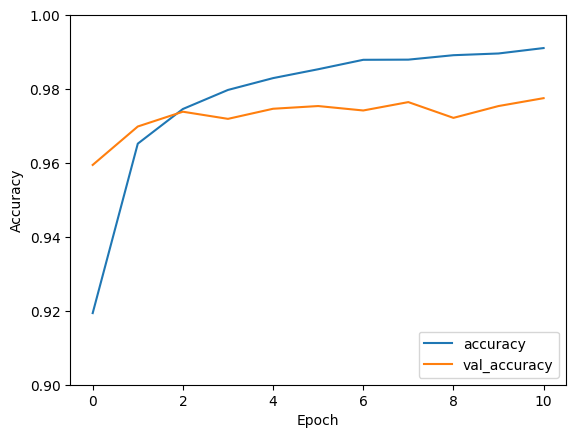

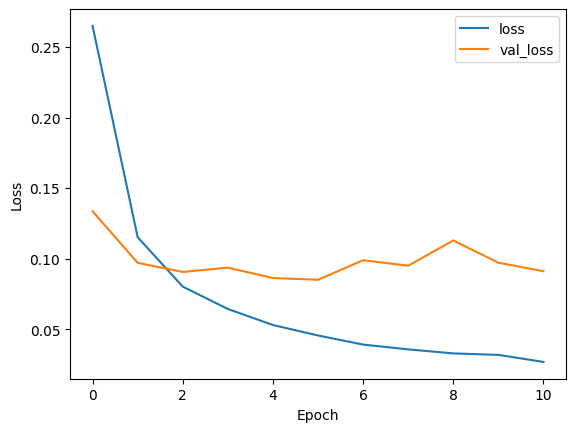

In [27]:
## Tu modelo y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## pero recuerda visualizar la gráfica con la tasa de acierto
## así como utilizar la función predict() para tu última evaluación
## (deberás consultar la documentación de Keras para entender la función)
## No olvides utilizar celdas de Markdown para texto

model_final = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_final.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

early_stopping_final = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

print("Entrenando modelo final:")
history_final = model_final.fit(training_images, training_labels, epochs=50, batch_size=64, validation_split=0.25, callbacks=[early_stopping_final])

# Evaluar el modelo final en los datos de test
loss, accuracy = model_final.evaluate(test_images, test_labels)
print("Accuracy en datos de test:", accuracy)

# Visualizar la gráfica de accuracy y loss durante el entrenamiento
plt.plot(history_final.history['accuracy'], label='accuracy')
plt.plot(history_final.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history_final.history['loss'], label='loss')
plt.plot(history_final.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

- Arquitectura del Modelo: Experimentar con el número de capas densas y la cantidad de neuronas en cada capa. Aumentar la complejidad del modelo (más capas o neuronas) le permite aprender patrones más intrincados, pero también incrementa el riesgo de sobreajuste si no se aplican técnicas de regularización adecuadas.

- Optimización y Hiperparámetros: Seleccionar un optimizador eficaz (como Adam o RMSprop, que suelen funcionar bien en este tipo de problemas) y ajustar sus parámetros si es necesario. El tamaño del batch también influye en la estabilidad y velocidad del entrenamiento.

- Unidades de Activación: Mantener el uso de unidades de activación que han demostrado ser efectivas (como ReLU en las capas ocultas) para asegurar un flujo de gradientes adecuado durante el entrenamiento.

- Técnicas de Regularización: Este es un aspecto crucial para evitar el sobreajuste. Implementar técnicas como:

1.  Dropout: Desactivar aleatoriamente un porcentaje de neuronas durante el entrenamiento para evitar que la red dependa demasiado de neuronas específicas.

2. Regularización L1 o L2: Añadir una penalización a la función de pérdida basada en el tamaño de los pesos del modelo, lo que tiende a mantener los pesos pequeños.

3. Batch Normalization: Normalizar las activaciones de las capas para estabilizar el entrenamiento y permitir el uso de tasas de aprendizaje más altas.

- Early Stopping: Utilizar esta técnica como un callback durante el entrenamiento. Permite monitorear una métrica en el conjunto de validación (como la pérdida de validación o la precisión de validación) y detener el entrenamiento automáticamente cuando esa métrica deja de mejorar. Esto previene el sobreajuste y ahorra tiempo de cómputo al no entrenar más de lo necesario.